In [0]:
%pip install accelerate
%pip install -i https://test.pypi.org/simple/ bitsandbytes

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 MB 25.9 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
image0 = "https://www.instyle.com/thmb/CdfUHOY8QqJB9pQdL9UB8DvVG0s=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/springfashiontrends21-b1688fb912194ebd9f8238312af48572.jpg"
image1 = "https://media.voguebusiness.com/photos/642c3460706ee157689b66bd/2:3/w_2560%2Cc_limit/ai-fashion-week-voguebus-story.jpg"
image2 = 'https://bananarepublicfactory.gapfactory.com/webcontent/0028/438/043/cn28438043.jpg'
image3 = "https://bananarepublic.gap.com/webcontent/0053/183/233/cn53183233.jpg"
image4 = "https://cdn2.stylecraze.com/wp-content/uploads/2018/02/Fashion-For-Women-Over-50--Outfit-Ideas-And-Wardrobe-Tips.jpg"



In [0]:
# pip install accelerate bitsandbytes
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl", load_in_8bit=True, device_map="auto")




Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [0]:
def describe_apparel(image_url, processor, model):
  img_url = image_url
  raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

  question = "Describe the apparel in this image in vivid detail:"
  inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

  out = model.generate(**inputs)
  print(processor.decode(out[0], skip_special_tokens=True)), display(raw_image)


/databricks/python/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


green plaid coat, yellow and green plaid dress, yellow and green sunglasses


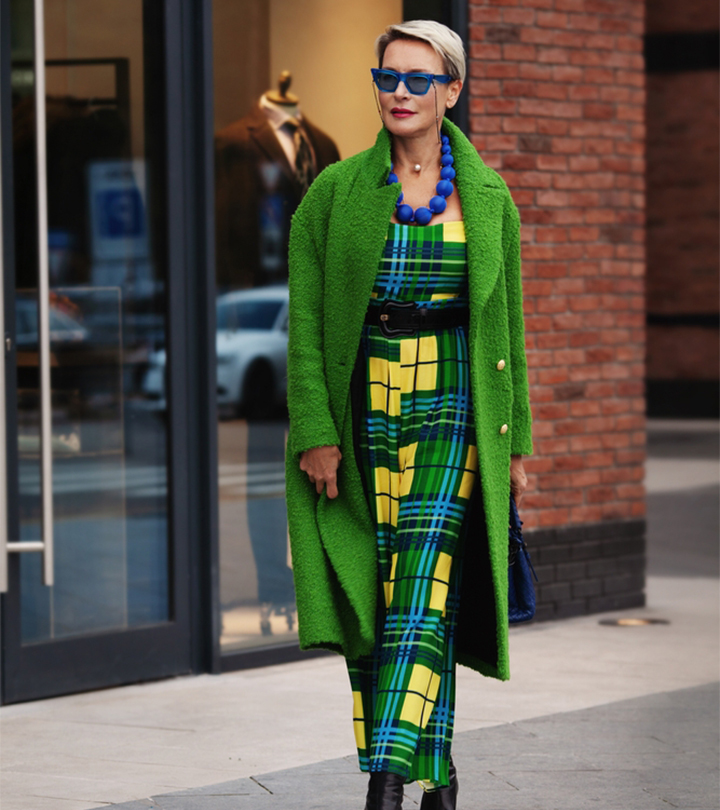

In [0]:
describe_apparel(image4, processor, model)